## Importing essential libraries

In [1]:
# Pandas for manupulating data
import pandas as pd

# Vizualization tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px # plotly is more advanced than matplotlib and seaborn
import plotly.graph_objects as go
import folium # used for plotting geographical data
from folium import plugins

# Manupulating default plot size
plt.rcParams["figure.figsize"] = 10,12

#Disable warnings
import warnings
warnings.filterwarnings("ignore")

## Part 1: Analyzing the Present Condition in India

In [2]:
df = pd.read_excel("C:/Users/Ashish/Desktop/Python Projects/COVID-19 analysis/Covid cases in India.xlsx")
df_India = df.copy()

In [3]:
df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


### Day by day data of India, Korea, Italy and Wuhan 

In [4]:
dbd_India = pd.read_excel("C:/Users/Ashish/Desktop/Python Projects/COVID-19 analysis/per_day_cases.xlsx", parse_dates = True, sheet_name = "India")
dbd_Italy = pd.read_excel("C:/Users/Ashish/Desktop/Python Projects/COVID-19 analysis/per_day_cases.xlsx", parse_dates = True, sheet_name = "Italy")
dbd_Korea = pd.read_excel("C:/Users/Ashish/Desktop/Python Projects/COVID-19 analysis/per_day_cases.xlsx", parse_dates = True, sheet_name = "Korea")
dbd_Wuhan = pd.read_excel("C:/Users/Ashish/Desktop/Python Projects/COVID-19 analysis/per_day_cases.xlsx", parse_dates = True, sheet_name = "Wuhan")

### Analyzing the COVID 19 cases in India

- Create a new column called **Total Cases** and confirm how many cases have been reported in India so far

In [5]:
df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [6]:
df.drop(["S. No."], axis = 1, inplace = True)

In [7]:
df["Total_Cases"] = df["Total Confirmed cases (Indian National)"] + df["Total Confirmed cases ( Foreign National )"]

In [8]:
Total_cases = df["Total_Cases"].sum()

In [9]:
print("Total number of confirmed COVID19 cases across India till date (22nd March, 2020) = ", Total_cases)

Total number of confirmed COVID19 cases across India till date (22nd March, 2020) =  562


In [10]:
# We will now highlight our dataframe

df.style.background_gradient(cmap = 'Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_Cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


### What do we get to know from this gradient coloring?

1. Darker the color of red, bigger is the number.
2. kerela and Maharashtra have the highest number of confirmed cases.
3. The Least number of cases are in Manipur, Chattisgarh and Mizoram

In [11]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_Cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33


### Number of active Covid Cases in India

In [12]:
df["Active_Cases"] = df["Total_Cases"] - (df["Cured"] + df["Death"])
Total_Active_Cases = df["Active_Cases"].sum()

In [13]:
print("Total number of COVID active cases in India as of (22nd March 2020) = ", Total_Active_Cases)

Total number of COVID active cases in India as of (22nd March 2020) =  512


In [14]:
Tot_Cases = df.groupby("Name of State / UT")["Active_Cases"].sum().sort_values(ascending = False).to_frame()
Tot_Cases.style.background_gradient(cmap = "Reds")

,Active_Cases
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


### Vizualizing Confirmed vs Recovered Figures

Text(0.5, 1.0, 'Total Cases V/S Cured Cases')

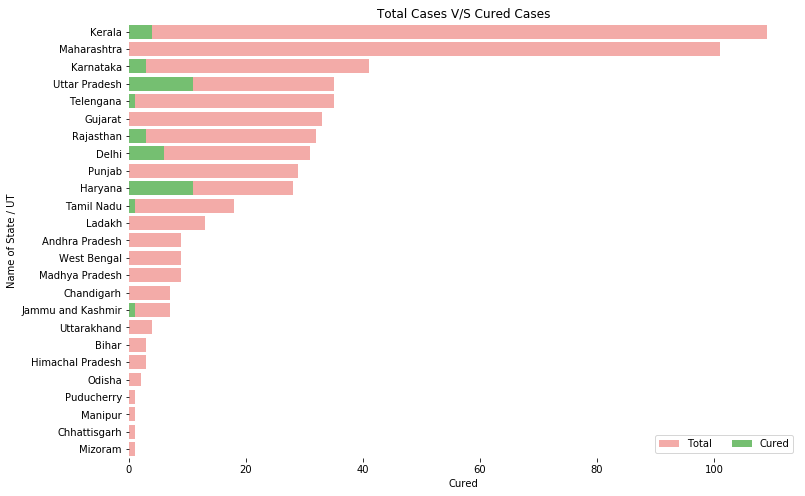

In [15]:
fig, ax = plt.subplots(figsize = (12,8))
data = df[["Name of State / UT", "Total_Cases", "Cured", "Death"]]
data.sort_values("Total_Cases", ascending = False, inplace = True)
sns.set_color_codes("pastel")
sns.barplot(x = "Total_Cases", y = "Name of State / UT", data = data, label = "Total", color = "r")
sns.set_color_codes("muted")
sns.barplot(x = "Cured", y = "Name of State / UT", data = data, label = "Cured", color = "g")
ax.legend(loc = "lower right", ncol = 2, frameon = True)
sns.despine(left = True, bottom = True)
ax.set_title("Total Cases V/S Cured Cases")

### From the above plot we can conclude that:

- Though Kerla has more number of total cases than Maharashtra, we can also see that it has more number of cured cases as well.
- Hence the number of active cases are more in Maharashtra. Hence maharashtra is more vulnerable to COVID 19.

## How Coronavirus Cases Are Rising

- Plot of date wise cases in India

In [16]:
dbd_India.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


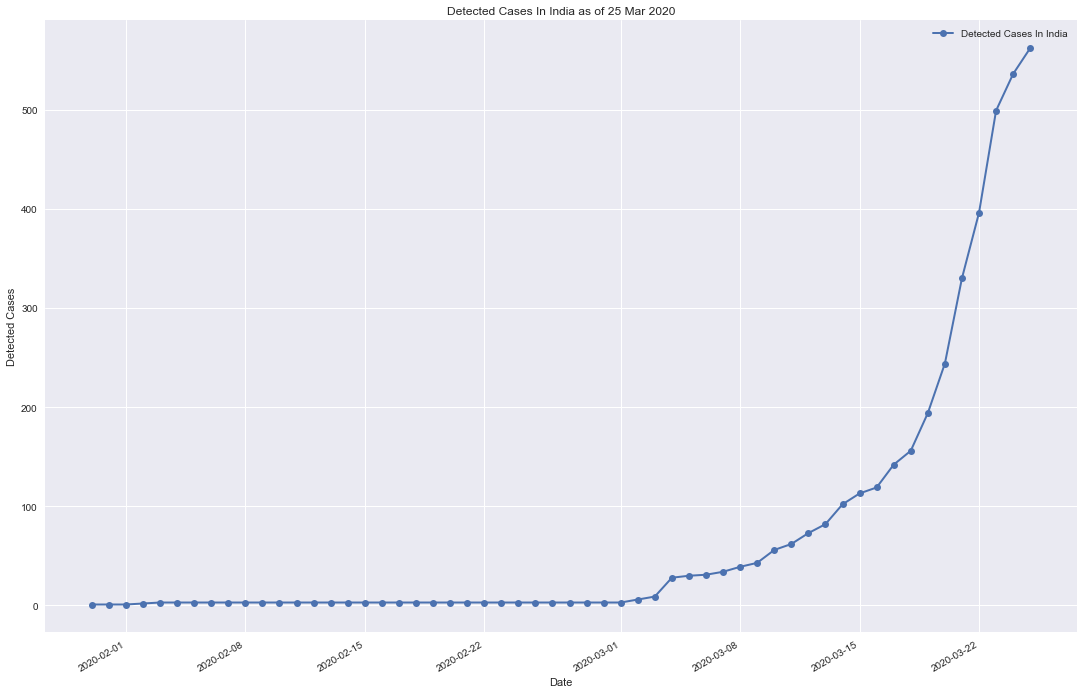

In [17]:
# Graph of total cases count each day
plt.style.use("seaborn")
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plt.plot("Date", "Total Cases", data = dbd_India, marker = 'o', linewidth = 2, label = "Detected Cases In India")
plt.xlabel("Date")
plt.ylabel("Detected Cases")
plt.title("Detected Cases In India as of 25 Mar 2020")
plt.gcf().autofmt_xdate()
plt.legend()

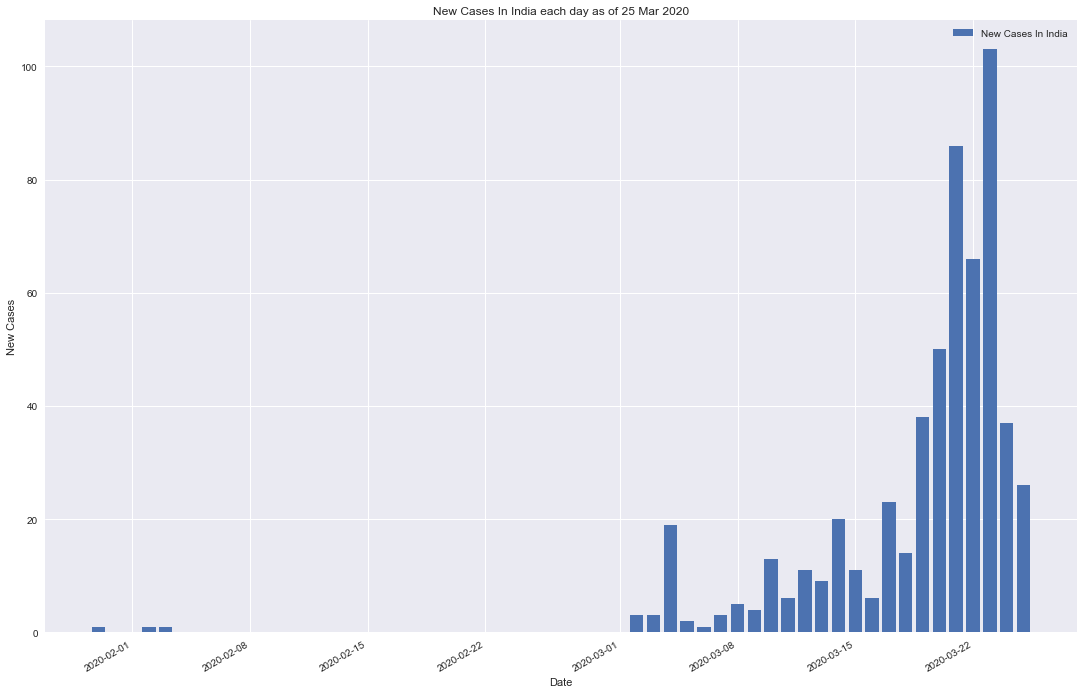

In [18]:
# Graph of new cases count each day
plt.style.use("seaborn")
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plt.bar("Date", "New Cases", data = dbd_India, label = "New Cases In India")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("New Cases In India each day as of 25 Mar 2020")
plt.gcf().autofmt_xdate()
plt.legend()

In [19]:
dbd_Italy.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-31,2,2,NaN
1,2020-02-01,2,0,NaN
2,2020-02-02,2,0,NaN
3,2020-02-03,2,0,NaN
4,2020-02-04,2,0,NaN


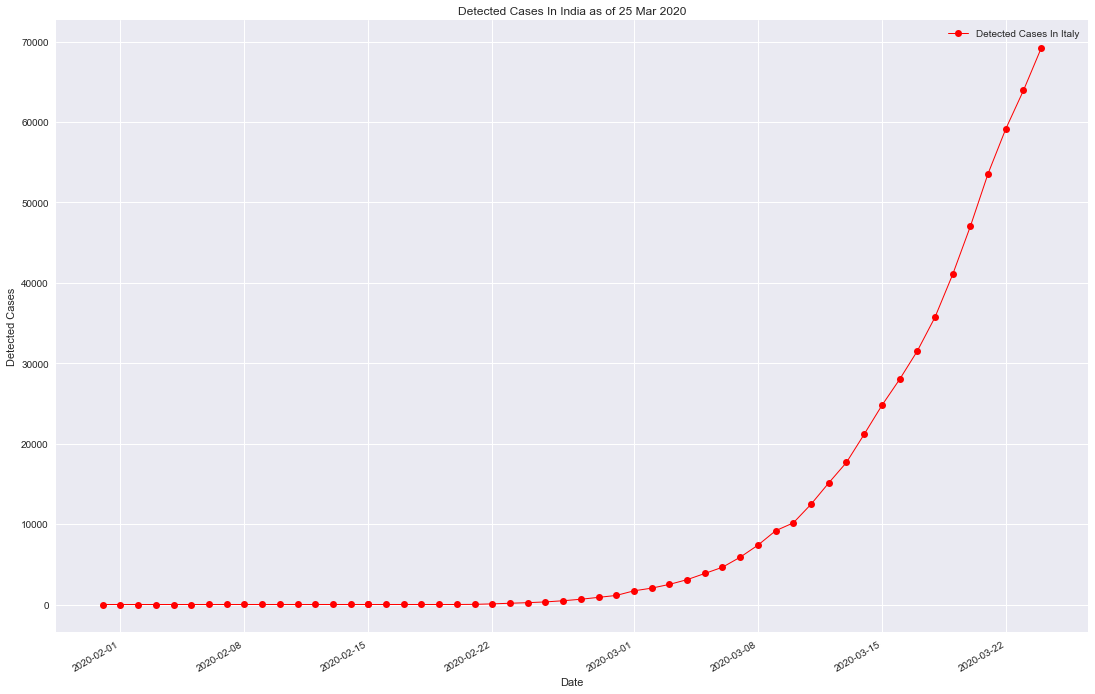

In [20]:
plt.style.use("seaborn")
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plt.plot("Date", "Total Cases", data = dbd_Italy, marker = 'o', linewidth = 1, label = "Detected Cases In Italy", color = "red")
plt.xlabel("Date")
plt.ylabel("Detected Cases")
plt.title("Detected Cases In India as of 25 Mar 2020")
plt.gcf().autofmt_xdate()
plt.legend()

- Comparing the Date by Date cases with Wuhan, Korea and Italy

In [21]:
dbd_Korea.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-20,1,1,NaN
1,2020-01-21,1,0,NaN
2,2020-01-22,1,0,NaN
3,2020-01-23,1,0,NaN
4,2020-01-24,2,1,NaN


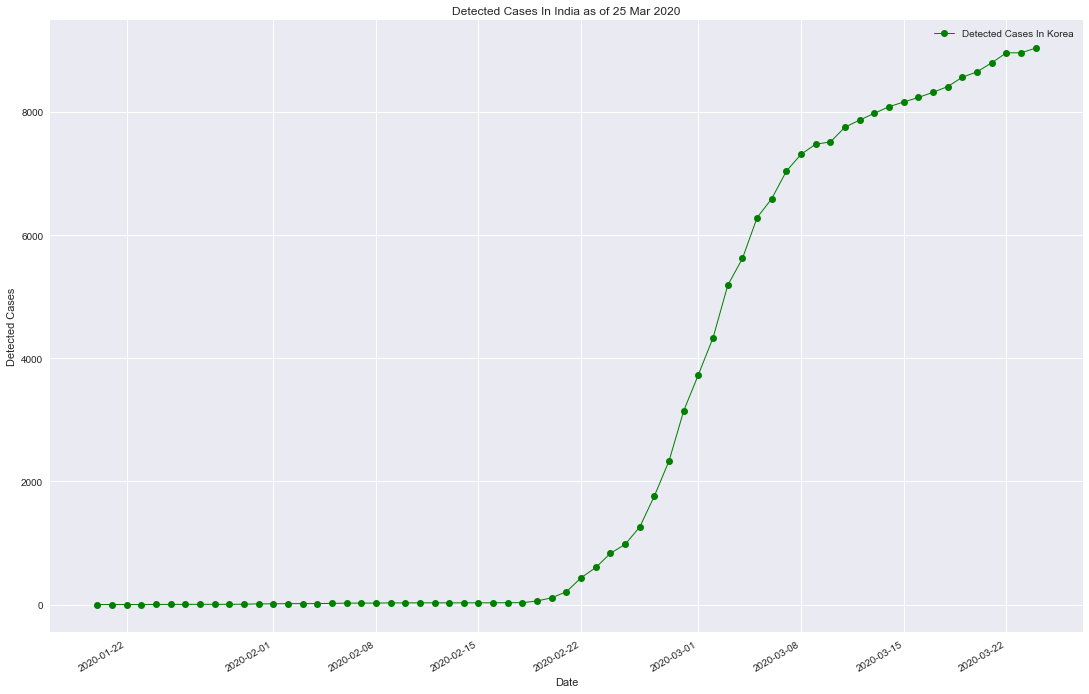

In [22]:
plt.style.use("seaborn")
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plt.plot("Date", "Total Cases", data = dbd_Korea, marker = 'o', linewidth = 1, label = "Detected Cases In Korea", color = "green")
plt.xlabel("Date")
plt.ylabel("Detected Cases")
plt.title("Detected Cases In India as of 25 Mar 2020")
plt.gcf().autofmt_xdate()
plt.legend()

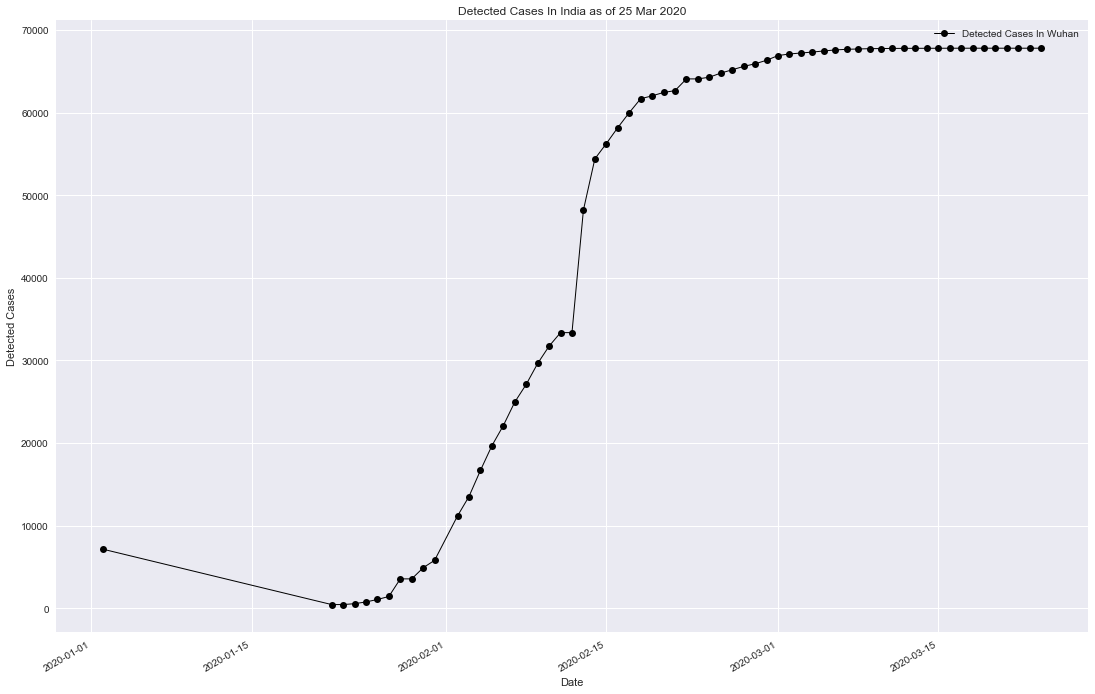

In [23]:
dbd_Wuhan.sort_values("Date", ascending = True, inplace = True)
plt.style.use("seaborn")
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plt.plot("Date", "Total Cases", data = dbd_Wuhan, marker = 'o', linewidth = 1, label = "Detected Cases In Wuhan", color = "black")
plt.xlabel("Date")
plt.ylabel("Detected Cases")
plt.title("Detected Cases In India as of 25 Mar 2020")
plt.gcf().autofmt_xdate()
plt.legend()

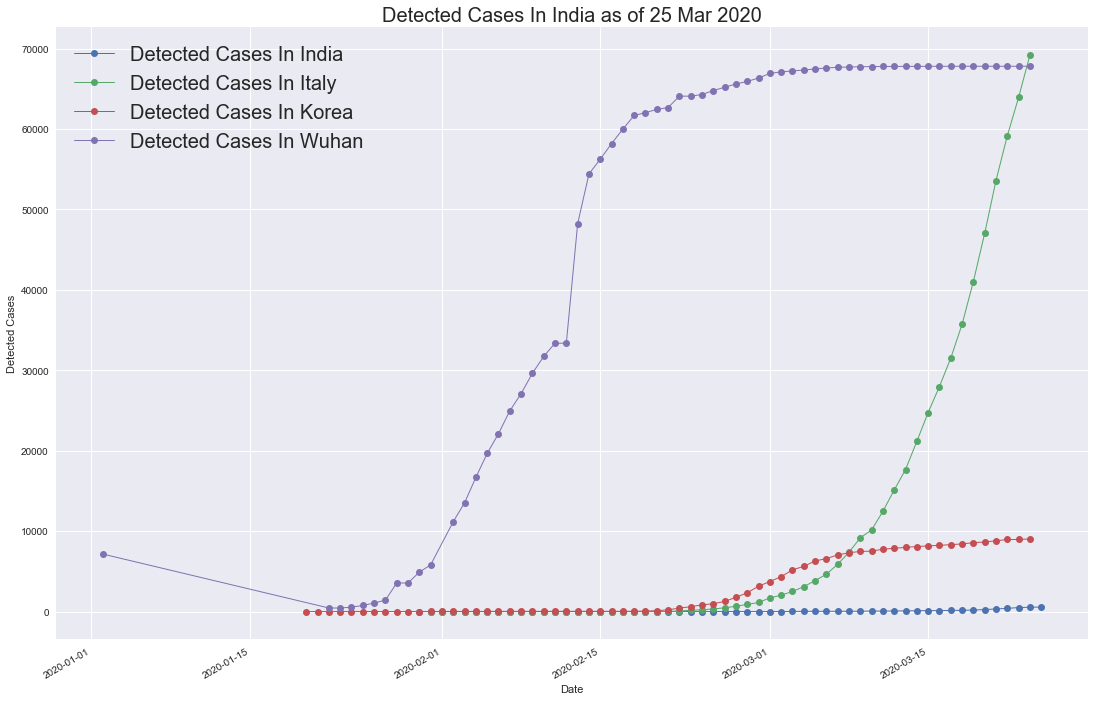

In [24]:
plt.style.use("seaborn")
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plt.plot("Date", "Total Cases", data = dbd_India, marker = 'o', linewidth = 1, label = "Detected Cases In India")
plt.plot("Date", "Total Cases", data = dbd_Italy, marker = 'o', linewidth = 1, label = "Detected Cases In Italy")
plt.plot("Date", "Total Cases", data = dbd_Korea, marker = 'o', linewidth = 1, label = "Detected Cases In Korea")
plt.plot("Date", "Total Cases", data = dbd_Wuhan, marker = 'o', linewidth = 1, label = "Detected Cases In Wuhan")
plt.xlabel("Date")
plt.ylabel("Detected Cases")
plt.title("Detected Cases In India as of 25 Mar 2020", fontsize = 20)
plt.gcf().autofmt_xdate()
plt.legend(loc = "upper left", fontsize = 20)

### Days After Crossing 100 Cases

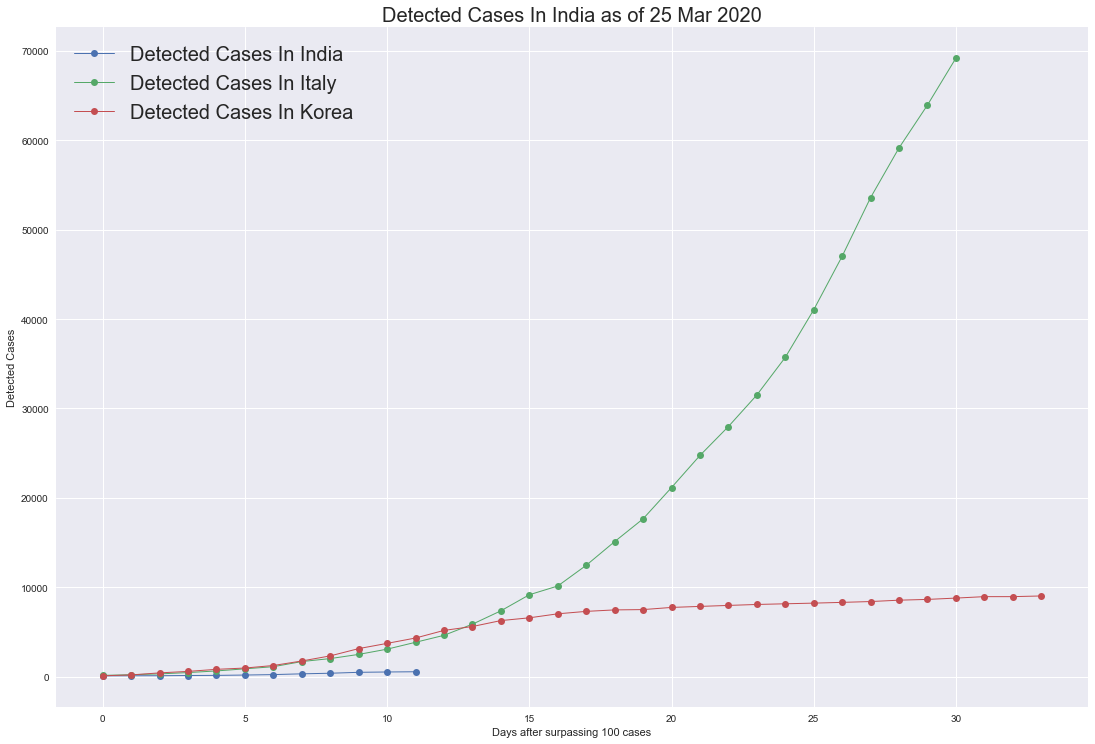

In [25]:
plt.style.use("seaborn")
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plt.plot("Days after surpassing 100 cases", "Total Cases", data = dbd_India, marker = 'o', linewidth = 1, label = "Detected Cases In India")
plt.plot("Days after surpassing 100 cases", "Total Cases", data = dbd_Italy, marker = 'o', linewidth = 1, label = "Detected Cases In Italy")
plt.plot("Days after surpassing 100 cases", "Total Cases", data = dbd_Korea, marker = 'o', linewidth = 1, label = "Detected Cases In Korea")
plt.xlabel("Days after surpassing 100 cases")
plt.ylabel("Detected Cases")
plt.title("Detected Cases In India as of 25 Mar 2020", fontsize = 20)
plt.legend(loc = "upper left", fontsize = 20)

### Exploring The World Wide Data

In [26]:
df = pd.read_csv("C:/Users/Ashish/Desktop/Python Projects/COVID-19 analysis/covid_19_clean_complete.csv")
df_recovered = pd.read_csv("C:/Users/Ashish/Desktop/Python Projects/COVID-19 analysis/time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("C:/Users/Ashish/Desktop/Python Projects/COVID-19 analysis/time_series_covid19_deaths_global.csv")
df_confirmed = pd.read_csv("C:/Users/Ashish/Desktop/Python Projects/COVID-19 analysis/time_series_covid19_confirmed_global.csv")

In [27]:
df.rename(columns = {"ObservationDate": "Date", "Country/Region": "Country"}, inplace = True)
df_recovered.rename(columns = {"Country/Region": "Country"}, inplace = True)
df_deaths.rename(columns = {"Country/Region": "Country"}, inplace = True)
df_confirmed.rename(columns = {"Country/Region": "Country"}, inplace = True)

In [28]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0


In [29]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df2 = df.groupby(["Date", "Country", "Province/State"])[["Date", "Country", "Province/State", "Confirmed", "Deaths", "Recovered"]].sum().reset_index()

In [31]:
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,1/22/20,Australia,Australian Capital Territory,0.0,0.0,0.0
1,1/22/20,Australia,From Diamond Princess,0.0,0.0,0.0
2,1/22/20,Australia,New South Wales,0.0,0.0,0.0
3,1/22/20,Australia,Northern Territory,0.0,0.0,0.0
4,1/22/20,Australia,Queensland,0.0,0.0,0.0


In [32]:
#Check for India's data

df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,1/22/20,0.0,0.0,0.0
1,1/23/20,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0
6,1/28/20,0.0,0.0,0.0
7,1/29/20,0.0,0.0,0.0
8,1/30/20,1.0,0.0,0.0
9,1/31/20,1.0,0.0,0.0


### Total Number of confirmed cases, deaths, recovered cases 

In [33]:
total = df.groupby("Date").sum().reset_index()
total["Date"] = pd.to_datetime(total["Date"])

In [34]:
total.sort_values("Date", inplace = True)
total.head()

,Date,Lat,Long,Confirmed,Deaths,Recovered
0,2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
1,2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2,2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
3,2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
4,2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


### Vizualizing Worldwide Covid19 cases

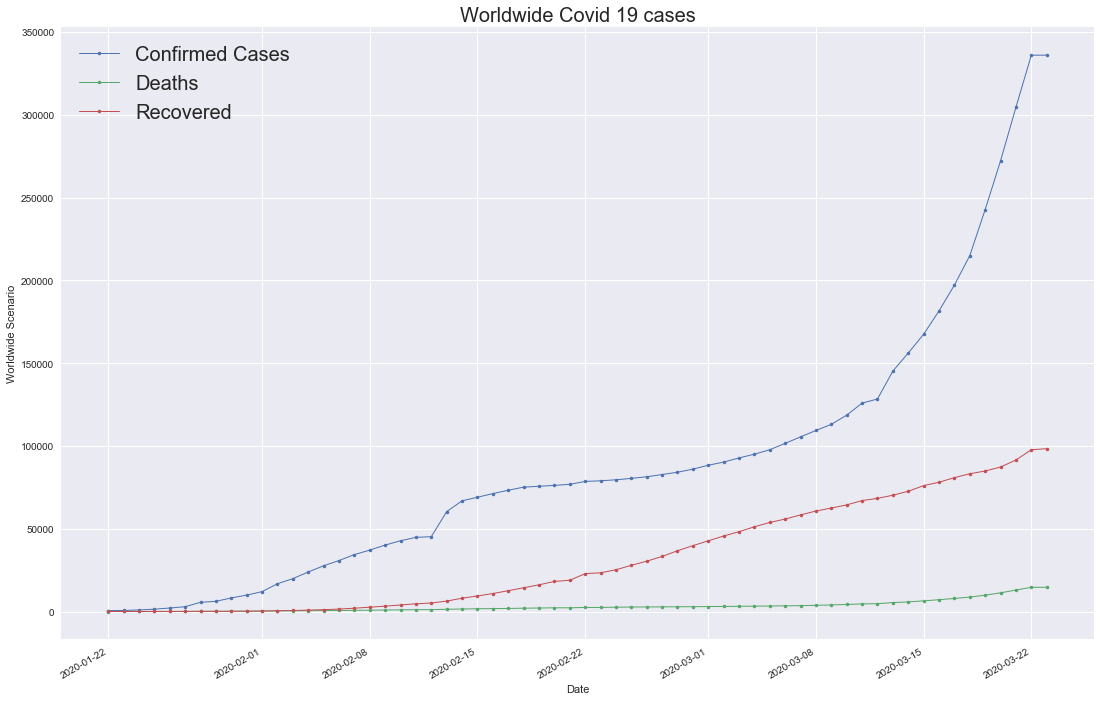

In [35]:
plt.style.use("seaborn")
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plt.plot("Date", "Confirmed", data = total, marker = '.', linewidth = 1, label = "Confirmed Cases")
plt.plot("Date", "Deaths", data = total, marker = '.', linewidth = 1, label = "Deaths")
plt.plot("Date", "Recovered", data = total, marker = '.', linewidth = 1, label = "Recovered")
plt.xlabel("Date")
plt.ylabel("Worldwide Scenario")
plt.title("Worldwide Covid 19 cases", fontsize = 20)
plt.gcf().autofmt_xdate()
plt.legend(loc = "upper left", fontsize = 20)

## Forecasting the total Number of Cases Worldwide.

In [36]:
from fbprophet import Prophet

In [37]:
df.columns

Index(['Province/State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [38]:
confirmed = df.groupby("Date")["Confirmed"].sum().reset_index()
deaths = df.groupby("Date")["Deaths"].sum().reset_index()
recovered = df.groupby("Date")["Recovered"].sum().reset_index()

In [47]:
confirmed

,ds,y
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0
5,2020-01-27,2922.0
6,2020-01-28,5573.0
7,2020-01-29,6161.0
8,2020-01-30,8229.0
9,2020-01-31,9920.0


The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [43]:
confirmed.columns = ["ds", "y"]  # renaming the columns

In [51]:
# Converting ds to date time format

confirmed["ds"] = pd.to_datetime(confirmed["ds"])

In [54]:
confirmed = confirmed.sort_values("ds", ascending= True).reset_index()

In [55]:
confirmed.tail()

,index,ds,y
57,49,2020-03-19,242708.0
58,51,2020-03-20,272166.0
59,52,2020-03-21,304524.0
60,53,2020-03-22,335955.0
61,54,2020-03-23,336004.0


### Making Predictions for confirmed cases

In [56]:
m = Prophet(interval_width = 0.95)

In [57]:
m.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
future = m.make_future_dataframe(periods = 15)

In [64]:
future.tail(10)

,ds
67,2020-03-29
68,2020-03-30
69,2020-03-31
70,2020-04-01
71,2020-04-02
72,2020-04-03
73,2020-04-04
74,2020-04-05
75,2020-04-06
76,2020-04-07


In [65]:
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
72,2020-04-03,479390.778075,452695.514789,510992.411788
73,2020-04-04,495830.415279,464741.063941,528729.526809
74,2020-04-05,512463.405812,481337.527816,543832.231250
75,2020-04-06,525685.099603,493165.244919,564621.259420
76,2020-04-07,538256.492140,498997.622554,581058.401492


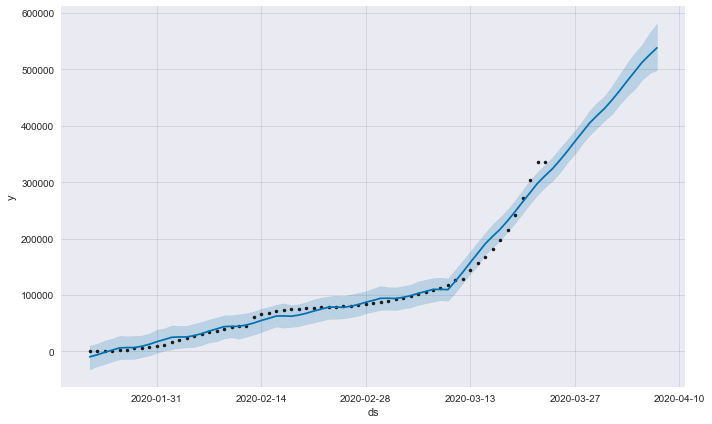

In [66]:
confirmed_forecast_plot = m.plot(forecast)

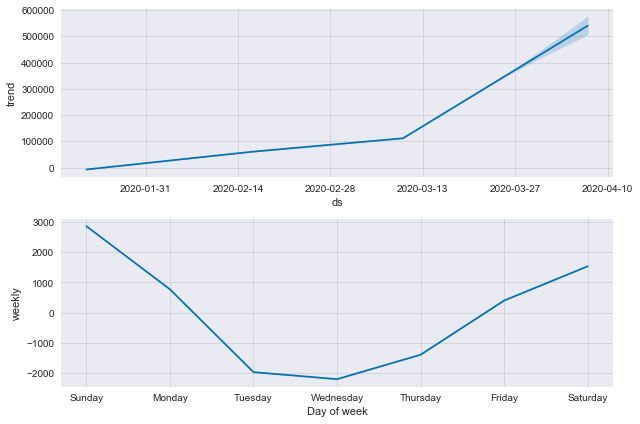

In [67]:
confirmed_forecast_plot = m.plot_components(forecast)

In [68]:
deaths.tail()

,Date,Deaths
57,3/5/20,3336.0
58,3/6/20,3446.0
59,3/7/20,3541.0
60,3/8/20,3781.0
61,3/9/20,3966.0


In [69]:
deaths.columns = ["ds", "y"]

In [70]:
deaths["ds"] = pd.to_datetime(deaths["ds"])

In [71]:
deaths = deaths.sort_values("ds", ascending = True).reset_index()

In [72]:
deaths.tail()

,index,ds,y
57,49,2020-03-19,9867.0
58,51,2020-03-20,11299.0
59,52,2020-03-21,12973.0
60,53,2020-03-22,14632.0
61,54,2020-03-23,14643.0


In [73]:
m = Prophet(interval_width= 0.95)
m.fit(deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
future = m.make_future_dataframe(periods=15)

In [75]:
future.tail()

,ds
72,2020-04-03
73,2020-04-04
74,2020-04-05
75,2020-04-06
76,2020-04-07


In [77]:
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
72,2020-04-03,21330.149015,20007.835444,22573.260365
73,2020-04-04,22137.436002,20690.120528,23572.740270
74,2020-04-05,22962.036795,21427.233334,24472.889408
75,2020-04-06,23621.517589,22000.431986,25260.800156
76,2020-04-07,24223.330770,22268.409649,26008.572326


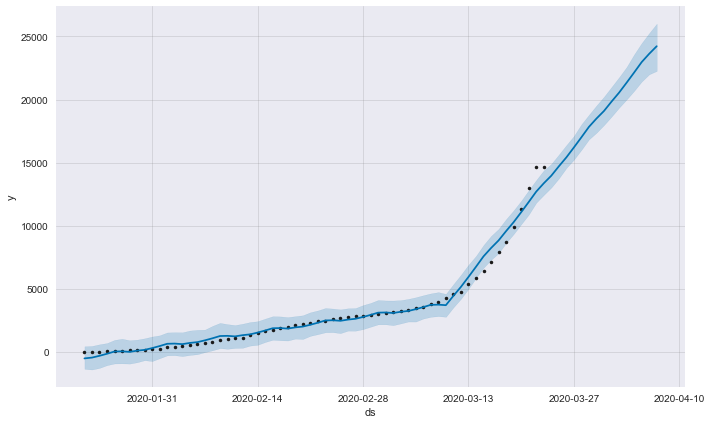

In [78]:
confirmed_forecast_plot = m.plot(forecast)

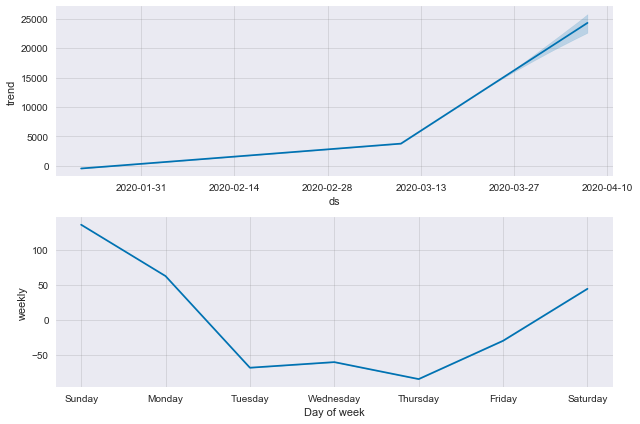

In [81]:
confirmed_forecast_plot = m.plot_components(forecast)

In [82]:
recovered.tail()

,Date,Recovered
57,3/5/20,53789.0
58,3/6/20,55858.0
59,3/7/20,58351.0
60,3/8/20,60687.0
61,3/9/20,62487.0


In [83]:
recovered.columns = ["ds", "y"]

In [84]:
recovered["ds"] = pd.to_datetime(recovered["ds"])

In [85]:
recovered = recovered.sort_values("ds", ascending = True).reset_index()

In [86]:
recovered.tail()

,index,ds,y
57,49,2020-03-19,84854.0
58,51,2020-03-20,87256.0
59,52,2020-03-21,91499.0
60,53,2020-03-22,97704.0
61,54,2020-03-23,98334.0


In [87]:
m = Prophet(interval_width= 0.95)

In [88]:
m.fit(recovered)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [89]:
future = m.make_future_dataframe(periods =  15)

In [90]:
future.tail()

,ds
72,2020-04-03
73,2020-04-04
74,2020-04-05
75,2020-04-06
76,2020-04-07


In [91]:
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
72,2020-04-03,122255.671296,117534.739519,126865.626708
73,2020-04-04,125173.957004,119599.642817,130217.118161
74,2020-04-05,128036.942225,121772.265980,133958.747702
75,2020-04-06,130162.607791,123296.399121,136551.853684
76,2020-04-07,132238.439653,124745.861586,139131.526947


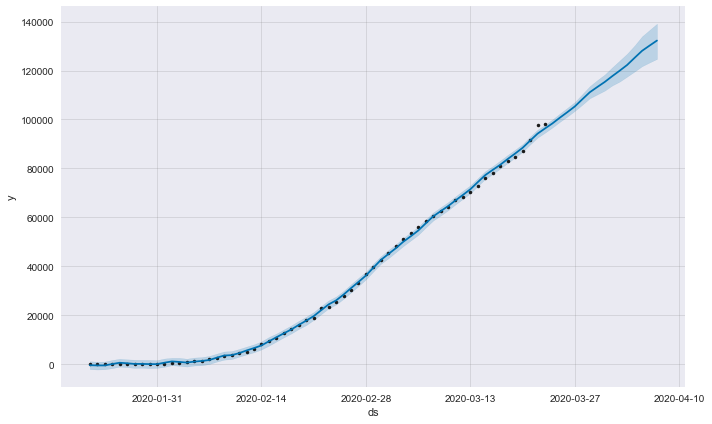

In [92]:
confirmed_forecast_plot = m.plot(forecast)

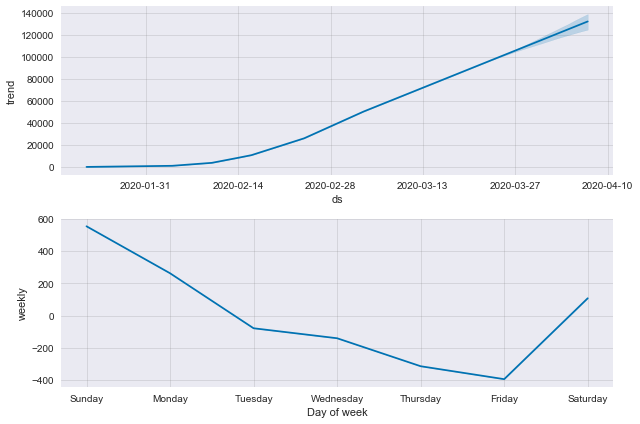

In [93]:
confirmed_forecast_plot = m.plot_components(forecast)